In [ ]:
# we can start coding here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


# Set Pandas display options to show all columns and rows
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/Shareddrives/Humana_mays_Competetion/Data/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(data_path+"Training_1006.csv")
print(df.shape)
print(df.columns)
df.head(5)

(1232, 58)
Index(['therapy_id', 'tgt_ade_dc_ind', 'race_cd', 'est_age', 'sex_cd',
       'cms_disabled_ind', 'cms_low_income_ind', 'rx_claims',
       'unique_ndc_id_cnt', 'pay_day_supply_cnt_avg', 'rx_cost_sum',
       'tot_drug_cost_accum_amt_max', 'reversal_ind_sum', 'mail_order_ind_sum',
       'generic_ind_sum', 'maint_ind_sum', 'specialty_ind_sum',
       'n_rx_claims_bfr', 'n_rx_claims_aftr', 'pay_day_supply_cnt_avg_bfr',
       'pay_day_supply_cnt_avg_aftr', 'pay_day_supply_cnt_sum_bfr',
       'pay_day_supply_cnt_sum_aftr', 'rx_cost_sum_bfr',
       'rx_cost_sum_aftr_thrpy', 'reversal_ind_sum_bfr',
       'reversal_ind_sum_aftr', 'mail_order_ind_sum_bfr',
       'mail_order_ind_sum_aftr_thrpy_strt', 'generic_ind_sum_bfr_thrpy_strt',
       'generic_ind_sum_aftr', 'maint_ind_sum_bfr',
       'maint_ind_sum_aft_thrpy_strt', 'specialty_ind_sum_bfr',
       'specialty_ind_sum_aftr_thrpy_strt', 'rxclms_duration',
       'ddi_aftr_ratio', 'anticoag_prop_aftr_thrpy_strt',
       'dia

,therapy_id,tgt_ade_dc_ind,race_cd,est_age,sex_cd,cms_disabled_ind,cms_low_income_ind,rx_claims,unique_ndc_id_cnt,pay_day_supply_cnt_avg,rx_cost_sum,tot_drug_cost_accum_amt_max,reversal_ind_sum,mail_order_ind_sum,generic_ind_sum,maint_ind_sum,specialty_ind_sum,n_rx_claims_bfr,n_rx_claims_aftr,pay_day_supply_cnt_avg_bfr,pay_day_supply_cnt_avg_aftr,pay_day_supply_cnt_sum_bfr,pay_day_supply_cnt_sum_aftr,rx_cost_sum_bfr,rx_cost_sum_aftr_thrpy,reversal_ind_sum_bfr,reversal_ind_sum_aftr,mail_order_ind_sum_bfr,mail_order_ind_sum_aftr_thrpy_strt,generic_ind_sum_bfr_thrpy_strt,generic_ind_sum_aftr,maint_ind_sum_bfr,maint_ind_sum_aft_thrpy_strt,specialty_ind_sum_bfr,specialty_ind_sum_aftr_thrpy_strt,rxclms_duration,ddi_aftr_ratio,anticoag_prop_aftr_thrpy_strt,diarrhea_aftr_ratio,nausea_prop_aftr_thrpy_strt,seizure_aftr_ratio,med_claims,medclm_process_time_avg,medclms_duration,ade_diagnosis_prop_aftr_thrpy_strt,seizure_diagnosis_ratio,pain_diagnosis_ratio,fatigue_diagnosis_prop_aftr_thrpy_strt,nausea_diagnosis_prop_aftr_thrpy_strt,hyperglycemia_diagnosis_prop_aftr_thrpy_strt,constipation_diagnosis_prop_aftr_thrpy_strt,diarrhea_diagnosis_ratio,service_date_fst_start,service_date_last_from_thrpy_strt,visit_date_fst_from_thrpy_strt,visit_date_lst_from_thrpy_strt,process_date_fst_start,process_date_lst_start
0,1005597228-TAGRISSO-1,0,1.0,NaN,NaN,NaN,NaN,20.0,8.0,24.000000,116914.54,0.00,0.0,0.0,6.0,8.0,7.0,5.0,14.0,2.750000,19.750000,55.0,395.0,47.30,101874.97,0.0,0.0,0.0,0.0,5.0,1.0,1.0,7.0,0.0,6.0,239.0,0.000000,0.000000,0.0,0.0,0.874891,206.0,17.723301,0.0,0.999001,0.999001,0.0,0.000000,0.0,0.0,0.000000,0.0,-63.0,176.0,-55.0,-55.0,-41.0,-43.0
1,1005964858-TAGRISSO-1,1,1.0,86.0,M,0.0,0.0,19.0,11.0,57.105263,16172.60,16340.00,0.0,9.0,16.0,17.0,1.0,14.0,4.0,46.052632,9.473684,875.0,180.0,170.85,32.86,0.0,0.0,8.0,1.0,12.0,4.0,13.0,4.0,0.0,0.0,111.0,0.000000,0.000000,0.0,0.0,0.000000,141.0,25.000000,-2.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,-91.0,20.0,-68.0,-70.0,-64.0,-59.0
2,1007548572-TAGRISSO-1,0,1.0,79.0,F,0.0,1.0,541.0,52.0,9.112754,113825.97,107618.52,0.0,0.0,474.0,513.0,6.0,286.0,254.0,3.889094,5.168207,2104.0,2796.0,6566.85,90986.06,0.0,0.0,0.0,0.0,256.0,218.0,271.0,242.0,0.0,5.0,311.0,0.421042,0.444432,0.0,0.0,0.000000,425.0,133.202353,206.0,0.999917,0.000000,0.0,0.999917,0.0,0.0,0.000000,0.0,-136.0,175.0,-40.0,166.0,-15.0,178.0
3,1009508044-TAGRISSO-1,0,1.0,70.0,F,1.0,1.0,90.0,36.0,35.166667,97502.35,91085.12,0.0,21.0,42.0,60.0,6.0,22.0,67.0,7.877778,26.955556,709.0,2426.0,9265.86,72580.72,0.0,0.0,3.0,18.0,7.0,35.0,19.0,41.0,0.0,5.0,864.0,0.000000,0.749906,0.0,0.0,0.000000,416.0,30.283654,-32.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,-692.0,172.0,18.0,-14.0,22.0,-6.0
4,1028064791-TAGRISSO-1,0,2.0,74.0,F,1.0,1.0,89.0,59.0,47.955056,86032.53,85208.94,0.0,78.0,29.0,32.0,4.0,24.0,64.0,13.865169,33.752809,1234.0,3004.0,856.33,74718.88,0.0,0.0,18.0,60.0,13.0,16.0,14.0,18.0,0.0,3.0,265.0,0.749813,0.000000,0.0,0.0,0.000000,237.0,27.198312,-18.0,0.999001,0.000000,0.0,0.000000,0.0,0.0,0.999001,0.0,-90.0,175.0,-8.0,-26.0,1.0,-6.0


In [ ]:
#dropping id variable
df.drop(['therapy_id'],axis=1,inplace=True)

######################################    TRAIN    ###################################
cols_to_impute = [col for col in df.columns if df[col].isna().sum()>0]
num_cols_to_impute = [col for col in df.columns if df[col].isna().sum()>0 and df[col].dtype != 'O']
cat_cols_to_impute = [col for col in df.columns if df[col].isna().sum()>0 and df[col].dtype == 'O']
print(cols_to_impute)
print(num_cols_to_impute)
print(cat_cols_to_impute)

# imputing with missing value indicators - simple imputer - numeric variables
from sklearn.impute import SimpleImputer
for col in num_cols_to_impute:
  ############ -10000 with missing indicator  ############
  imputer = SimpleImputer(strategy='median',add_indicator=True)
  temp = imputer.fit_transform(df[col].values.reshape(-1,1))
  df[col] = temp[:,0]
  df[col+'_Missing'] = temp[:,1]

for col in cat_cols_to_impute:
  df[col] = df[col].fillna('Unknown')


['race_cd', 'est_age', 'sex_cd', 'cms_disabled_ind', 'cms_low_income_ind', 'rx_claims', 'unique_ndc_id_cnt', 'pay_day_supply_cnt_avg', 'rx_cost_sum', 'tot_drug_cost_accum_amt_max', 'reversal_ind_sum', 'mail_order_ind_sum', 'generic_ind_sum', 'maint_ind_sum', 'specialty_ind_sum', 'n_rx_claims_bfr', 'n_rx_claims_aftr', 'pay_day_supply_cnt_avg_bfr', 'pay_day_supply_cnt_avg_aftr', 'pay_day_supply_cnt_sum_bfr', 'pay_day_supply_cnt_sum_aftr', 'rx_cost_sum_bfr', 'rx_cost_sum_aftr_thrpy', 'reversal_ind_sum_bfr', 'reversal_ind_sum_aftr', 'mail_order_ind_sum_bfr', 'mail_order_ind_sum_aftr_thrpy_strt', 'generic_ind_sum_bfr_thrpy_strt', 'generic_ind_sum_aftr', 'maint_ind_sum_bfr', 'maint_ind_sum_aft_thrpy_strt', 'specialty_ind_sum_bfr', 'specialty_ind_sum_aftr_thrpy_strt', 'rxclms_duration', 'ddi_aftr_ratio', 'anticoag_prop_aftr_thrpy_strt', 'diarrhea_aftr_ratio', 'nausea_prop_aftr_thrpy_strt', 'seizure_aftr_ratio', 'med_claims', 'medclm_process_time_avg', 'medclms_duration', 'ade_diagnosis_prop_a

<ipython-input-51-47eef98d8e2d>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col+'_Missing'] = temp[:,1]
<ipython-input-51-47eef98d8e2d>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col+'_Missing'] = temp[:,1]
<ipython-input-51-47eef98d8e2d>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

In [ ]:
print(df.columns)

Index(['tgt_ade_dc_ind', 'race_cd', 'est_age', 'sex_cd', 'cms_disabled_ind',
       'cms_low_income_ind', 'rx_claims', 'unique_ndc_id_cnt',
       'pay_day_supply_cnt_avg', 'rx_cost_sum', 'tot_drug_cost_accum_amt_max',
       'reversal_ind_sum', 'mail_order_ind_sum', 'generic_ind_sum',
       'maint_ind_sum', 'specialty_ind_sum', 'n_rx_claims_bfr',
       'n_rx_claims_aftr', 'pay_day_supply_cnt_avg_bfr',
       'pay_day_supply_cnt_avg_aftr', 'pay_day_supply_cnt_sum_bfr',
       'pay_day_supply_cnt_sum_aftr', 'rx_cost_sum_bfr',
       'rx_cost_sum_aftr_thrpy', 'reversal_ind_sum_bfr',
       'reversal_ind_sum_aftr', 'mail_order_ind_sum_bfr',
       'mail_order_ind_sum_aftr_thrpy_strt', 'generic_ind_sum_bfr_thrpy_strt',
       'generic_ind_sum_aftr', 'maint_ind_sum_bfr',
       'maint_ind_sum_aft_thrpy_strt', 'specialty_ind_sum_bfr',
       'specialty_ind_sum_aftr_thrpy_strt', 'rxclms_duration',
       'ddi_aftr_ratio', 'anticoag_prop_aftr_thrpy_strt',
       'diarrhea_aftr_ratio', 'nause

In [ ]:
print(df.shape)
# check if all the missing indicators are just same
missing_indicators = [col for col in df.columns if 'Missing' in col]

df_temp = df[missing_indicators].copy(deep=True)
df.drop(missing_indicators, axis=1, inplace=True)
#drop any duplicate missing indicator columns
df_temp = df_temp.T.drop_duplicates().T
df = pd.merge(df,df_temp,left_index=True,right_index=True)

(1232, 112)


In [ ]:
df.to_csv('/content/drive/Shareddrives/Humana_mays_Competetion/Data/Data_Prepared_v2.csv',index=False)

# Additional Data Analysis

In [ ]:
df[(df['tgt_ade_dc_ind']==1) & (df['med_claims_Missing']==0) & (df['rx_claims_Missing']==0)].shape

(110, 61)

In [ ]:
df[(df['tgt_ade_dc_ind']==1) & (df['med_claims_Missing']==0) & (df['rx_claims_Missing']==1)].shape

(7, 61)

In [ ]:
df[(df['tgt_ade_dc_ind']==1) & (df['med_claims_Missing']==1) & (df['rx_claims_Missing']==0)].shape

(0, 61)

In [ ]:
df[(df['tgt_ade_dc_ind']==1) & (df['med_claims_Missing']==1) & (df['rx_claims_Missing']==1)].shape

(0, 61)

In [ ]:
df[(df['tgt_ade_dc_ind']==0) & (df['med_claims_Missing']==0) & (df['rx_claims_Missing']==0)].shape

(413, 61)

In [ ]:
df[(df['tgt_ade_dc_ind']==0) & (df['med_claims_Missing']==0) & (df['rx_claims_Missing']==1)].shape

(6, 61)

In [ ]:
df[(df['tgt_ade_dc_ind']==0) & (df['med_claims_Missing']==1) & (df['rx_claims_Missing']==0)].shape

(637, 61)

In [ ]:
df[(df['tgt_ade_dc_ind']==0) & (df['med_claims_Missing']==1) & (df['rx_claims_Missing']==1)].shape

(59, 61)

In [ ]:
discontinued = df[df['tgt_ade_dc_ind']==1]
continued = df[df['tgt_ade_dc_ind']==0]

In [ ]:
continued[continued['med_claims_Missing'] == 0].shape

(419, 61)

In [ ]:
continued.shape

(1115, 61)

In [ ]:
disc_doc_visit = discontinued[discontinued['med_claims_Missing']==0]
continued_doc_visit

0.0    117
Name: med_claims_Missing, dtype: int64

In [ ]:
didnt_discontinue['med_claims_Missing'].value_counts()

1.0    696
0.0    419
Name: med_claims_Missing, dtype: int64

In [ ]:
discontinued['rx_cost_sum_aftr_thrpy'].describe()

count       117.000000
mean      29034.770085
std       27049.029637
min           0.000000
25%         642.180000
50%       31393.300000
75%       50296.800000
max      132252.220000
Name: rx_cost_sum_aftr_thrpy, dtype: float64

In [ ]:
discontinued['pay_day_supply_cnt_sum_aftr'].describe()

count     117.00000
mean      505.07265
std       475.61174
min         0.00000
25%       120.00000
50%       462.00000
75%       716.00000
max      2145.00000
Name: pay_day_supply_cnt_sum_aftr, dtype: float64

In [ ]:
didnt_discontinue['rx_cost_sum_aftr_thrpy'].describe()

count      1115.000000
mean      53535.467238
std       41617.792439
min           0.000000
25%        4231.330000
50%       51133.000000
75%       93091.095000
max      192110.170000
Name: rx_cost_sum_aftr_thrpy, dtype: float64

In [ ]:
didnt_discontinue['pay_day_supply_cnt_sum_aftr'].describe()

count    1115.000000
mean      669.526009
std       654.429291
min         0.000000
25%       180.000000
50%       486.500000
75%       966.500000
max      4203.000000
Name: pay_day_supply_cnt_sum_aftr, dtype: float64

In [ ]:
df['tgt_ade_dc_ind'].value_counts()

0    1115
1     117
Name: tgt_ade_dc_ind, dtype: int64

## Analyzing where medical claims are missing

In [ ]:
#people who didnt visit the doctor anytime
temp = df[df['n_med_claims_Missing']==1]

In [ ]:
temp['n_rx_claims_Missing'].value_counts()

0.0    637
1.0     59
Name: n_rx_claims_Missing, dtype: int64

In [ ]:
637/(637 + 59)

0.9152298850574713

In [ ]:
#91% of people where medical claims are missing have some pharmacy claims and they are not likely to discontinue

In [ ]:
# # Create and train a classifier
# clf = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',C=0.06) #,penalty='l1', solver='liblinear',, C=0.05
# clf.fit(X_train, y_train)

# # Make predictions on the test set
# y_train_pred = clf.predict(X_train)
# y_test_pred = clf.predict(X_test)
# y_train_pred_prob = clf.predict_proba(X_train)[:, 1]
# y_test_pred_prob = clf.predict_proba(X_test)[:, 1]

# # Evaluate the classifier
# print(classification_report(y_train, y_train_pred))
# print(classification_report(y_test, y_test_pred))

# # Calculate ROC AUC score
# roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)
# roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)
# print("ROC AUC Score:", roc_auc_train)
# print("ROC AUC Score:", roc_auc_test)

              precision    recall  f1-score   support

           0       0.98      0.82      0.90       780
           1       0.85      0.99      0.91       780

    accuracy                           0.91      1560
   macro avg       0.92      0.91      0.90      1560
weighted avg       0.92      0.91      0.90      1560

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       335
           1       0.36      0.91      0.52        35

    accuracy                           0.84       370
   macro avg       0.68      0.87      0.71       370
weighted avg       0.93      0.84      0.87       370

ROC AUC Score: 0.9582988165680474
ROC AUC Score: 0.9372281449893389


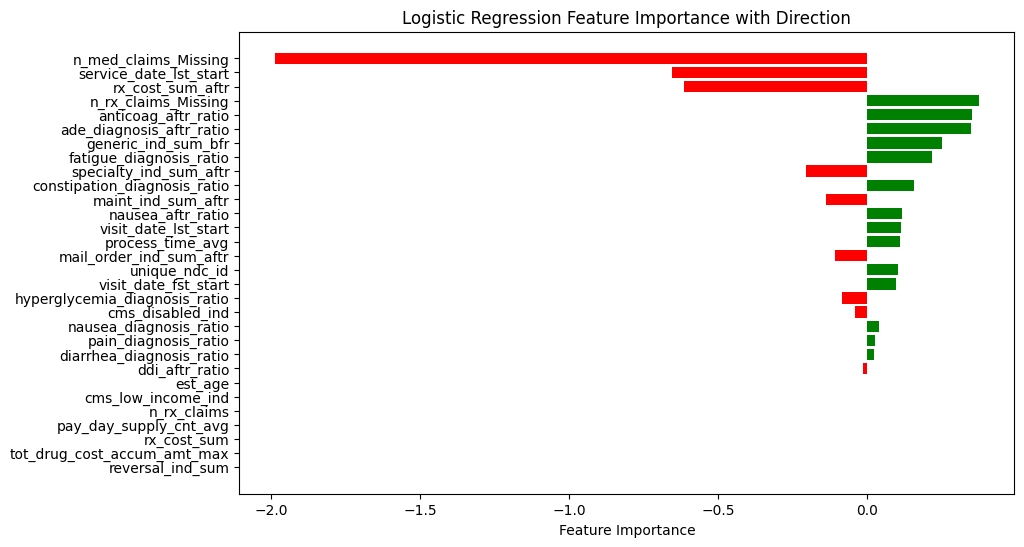

In [ ]:
# Get feature coefficients and names
coefficients = clf.coef_[0]
feature_names = X_train.columns

# Create a list of feature importance with directions
feature_importance = list(zip(feature_names, coefficients))

# Sort features by absolute coefficient values
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# Select the top 30 features
feature_importance = feature_importance[:30]

# Separate features and their directions
sorted_features, sorted_directions = zip(*[(feat, direction) for feat, direction in feature_importance])

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_directions, color=[('green' if d > 0 else 'red') for d in sorted_directions])
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance with Direction')
plt.gca().invert_yaxis()
plt.show()

## Top Feature Analysis

<Figure size 600x600 with 0 Axes>

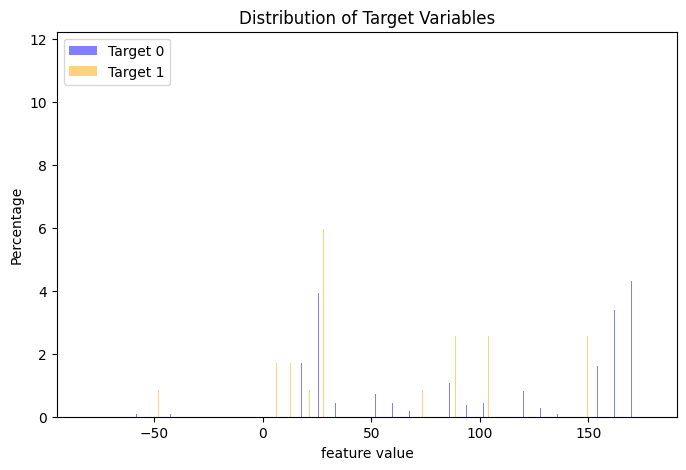

In [ ]:
plt.figure(figsize=(6,6))
col = 'service_date_lst_start'
# Create a single figure to plot both target variables
fig, ax = plt.subplots(figsize=(8, 5))

# Create histograms for Target 0
hist_target_0, bins_target_0 = np.histogram(class_0_data[col], bins=100, density=True)
percentage_target_0 = (hist_target_0 / hist_target_0.sum()) * 100
bin_centers_target_0 = 0.5 * (bins_target_0[:-1] + bins_target_0[1:])
ax.bar(bin_centers_target_0, percentage_target_0, width=0.1, label="Target 0", color="blue", alpha=0.5)

# Create histograms for Target 1
hist_target_1, bins_target_1 = np.histogram(class_1_data[col], bins=100, density=True)
percentage_target_1 = (hist_target_1 / hist_target_1.sum()) * 100
bin_centers_target_1 = 0.5 * (bins_target_1[:-1] + bins_target_1[1:])
ax.bar(bin_centers_target_1, percentage_target_1, width=0.1, label="Target 1", color="orange", alpha=0.5)

# # Add KDE plots
# sns.kdeplot(class_0_data[col], color="blue", label="KDE Target 0", ax=ax, shade=True)
# sns.kdeplot(class_1_data[col], color="orange", label="KDE Target 1", ax=ax, shade=True)
# Calculate KDE plot percentages
# kde_percentage_target_0 = (sns.kdeplot(class_0_data[col], color="blue").get_lines()[0].get_data()[1]) * 100
# kde_percentage_target_1 = (sns.kdeplot(class_1_data[col], color="orange").get_lines()[0].get_data()[1]) * 100

# # Set y-labels for KDE plots
# ax.set_yticks(np.arange(0, max(max(percentage_target_0), max(percentage_target_1), 5), 5))
# ax.set_yticklabels([f"{int(y)}%" for y in np.arange(0, max(max(percentage_target_0), max(percentage_target_1), 5), 5)])


# Set labels and legend
ax.set_xlabel('feature value')
ax.set_ylabel("Percentage")
ax.set_title("Distribution of Target Variables")
ax.legend()

# Show the plot
plt.show()

(array([385., 180., 231., 258.,  45.,   7.,   2.,   4.,   1.,   2.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

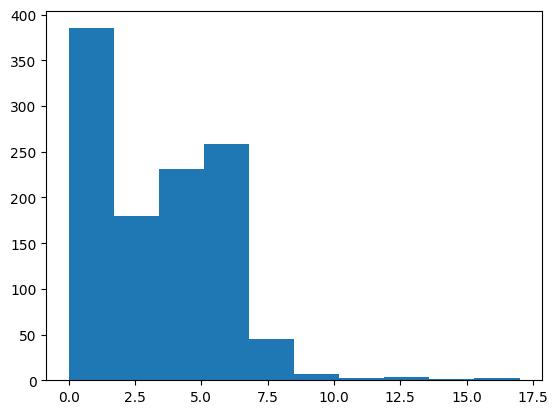

In [ ]:
col = 'specialty_ind_sum_aftr'
plt.hist(class_0_data[col])

(array([53., 25., 23., 14.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

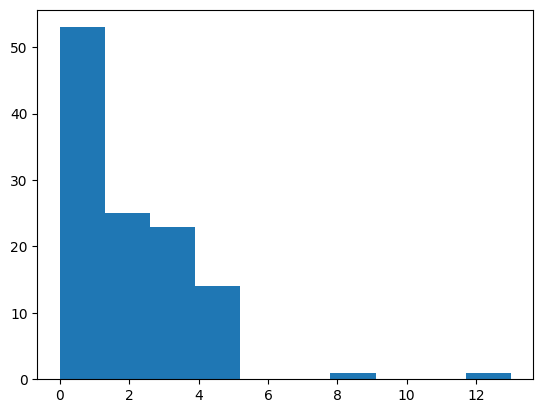

In [ ]:
plt.hist(class_1_data[col])

<Figure size 600x600 with 0 Axes>

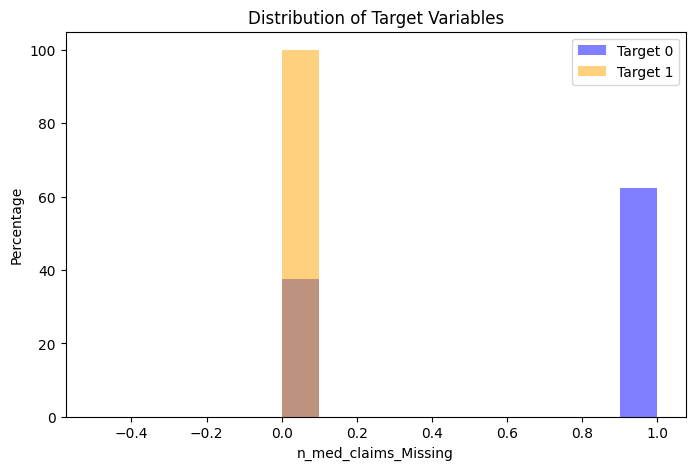

<Figure size 600x600 with 0 Axes>

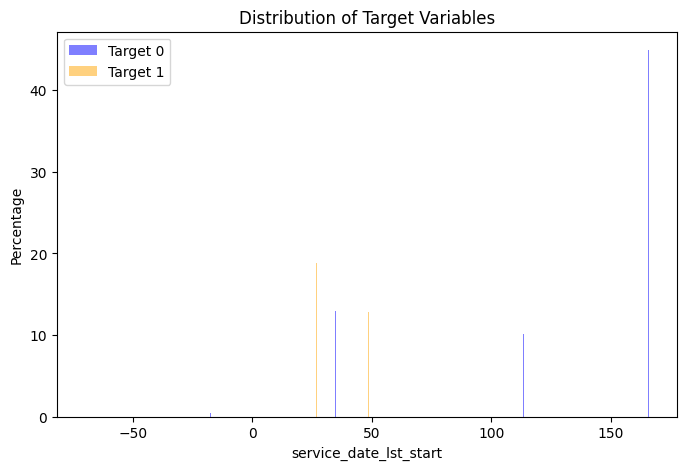

<Figure size 600x600 with 0 Axes>

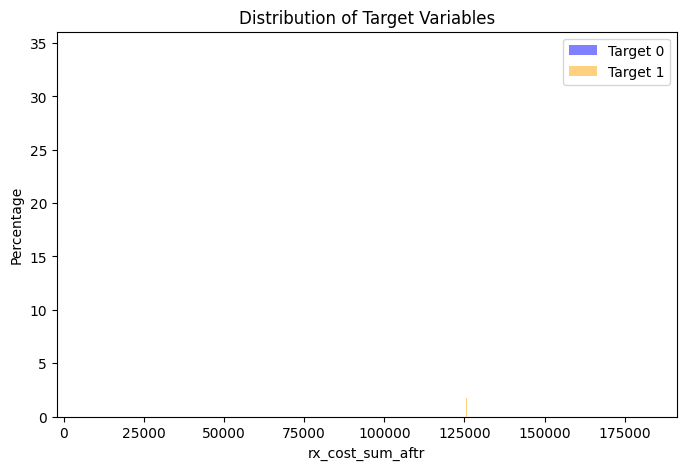

<Figure size 600x600 with 0 Axes>

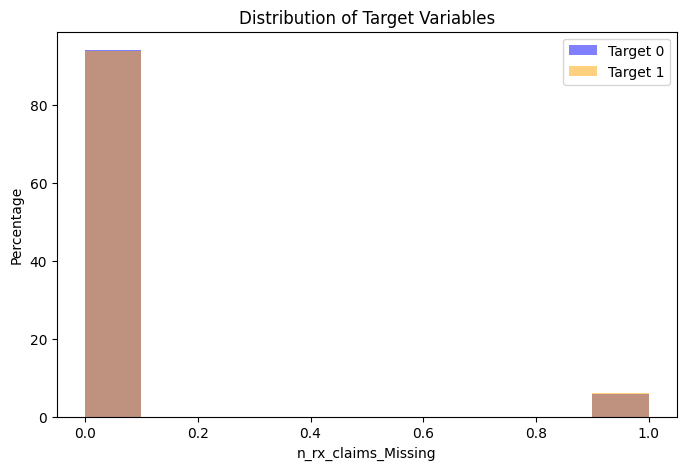

<Figure size 600x600 with 0 Axes>

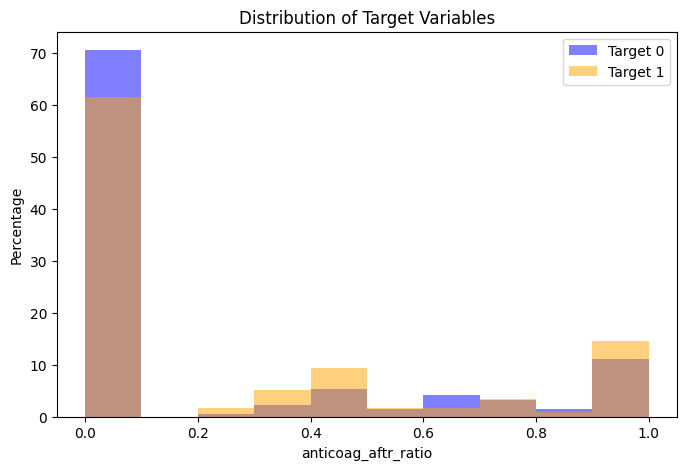

<Figure size 600x600 with 0 Axes>

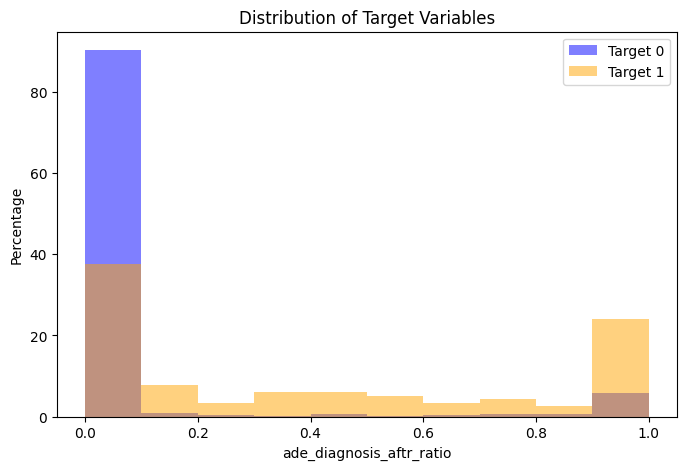

<Figure size 600x600 with 0 Axes>

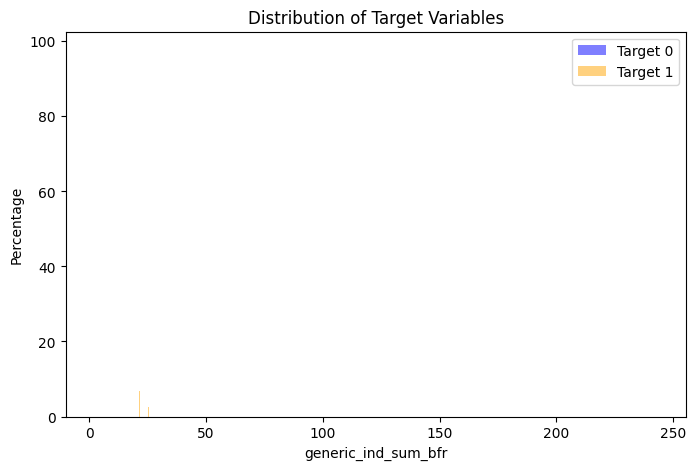

<Figure size 600x600 with 0 Axes>

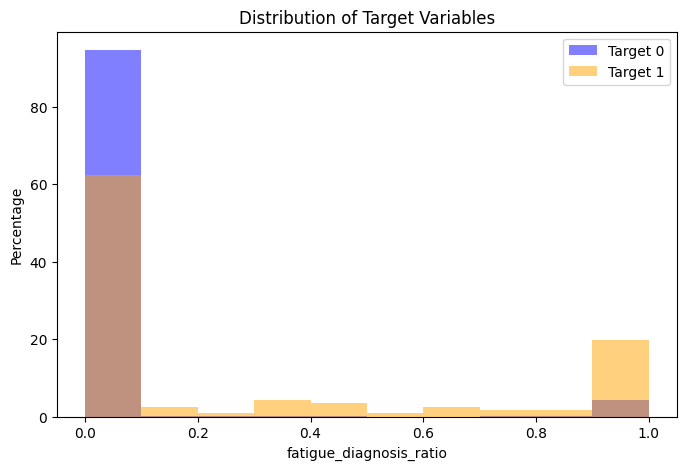

<Figure size 600x600 with 0 Axes>

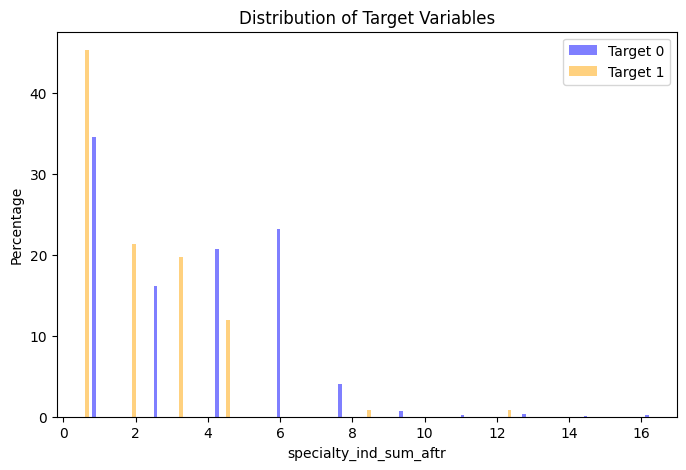

<Figure size 600x600 with 0 Axes>

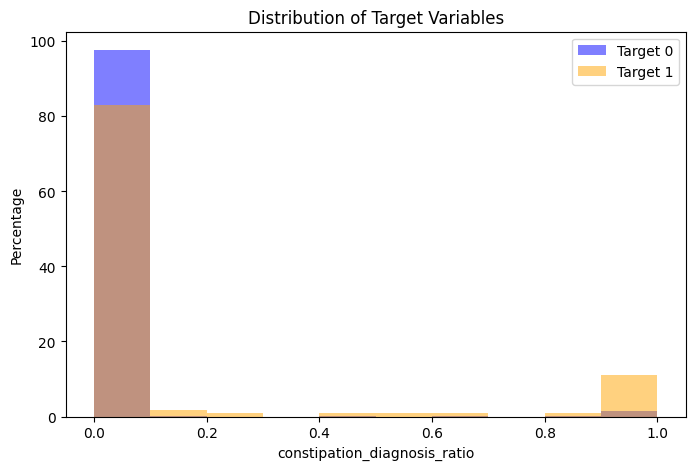

<Figure size 600x600 with 0 Axes>

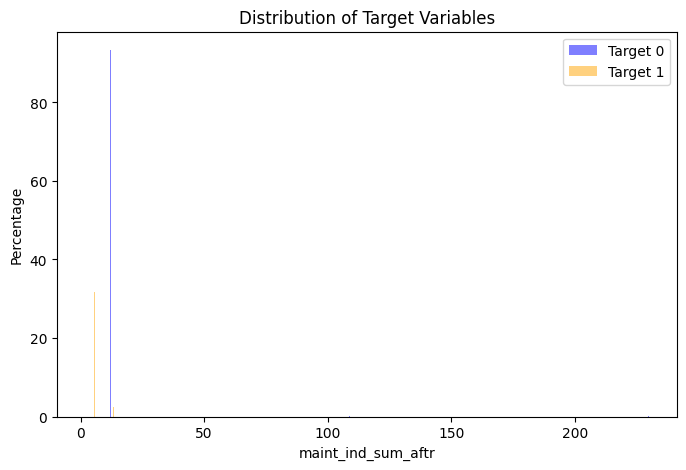

<Figure size 600x600 with 0 Axes>

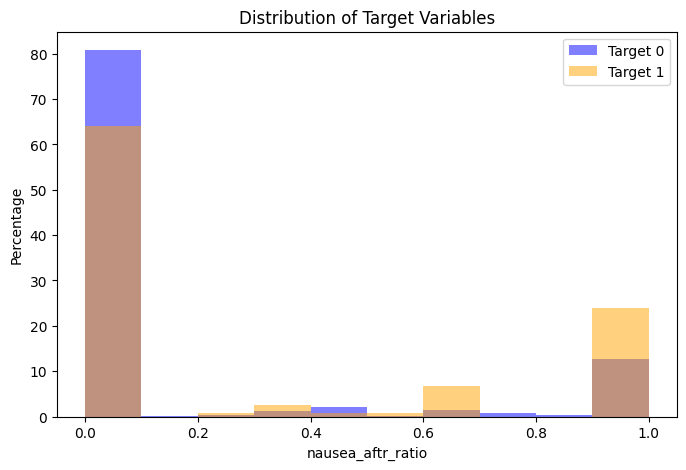

<Figure size 600x600 with 0 Axes>

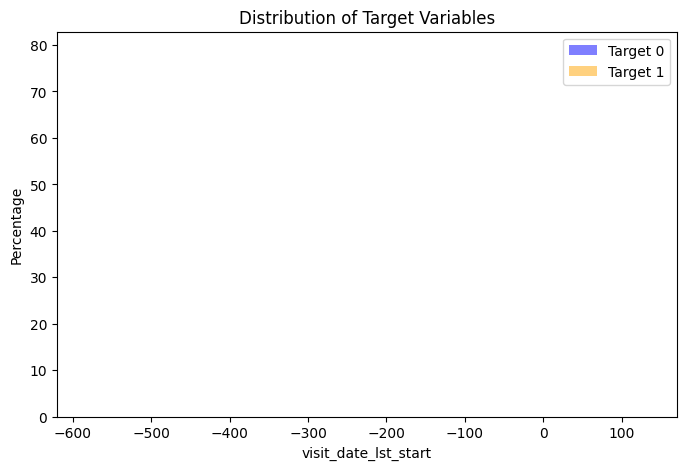

<Figure size 600x600 with 0 Axes>

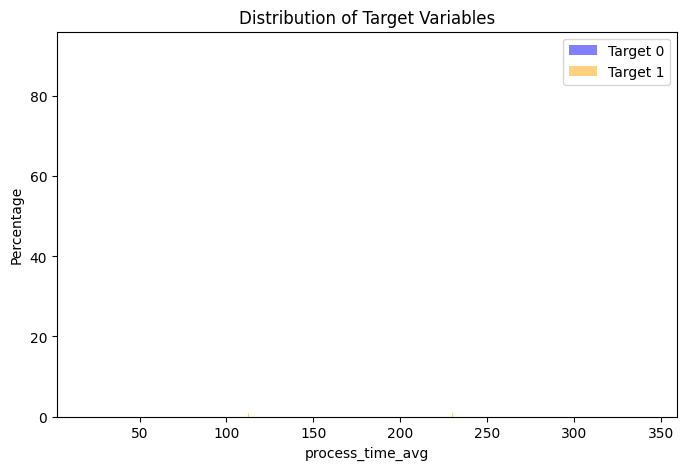

<Figure size 600x600 with 0 Axes>

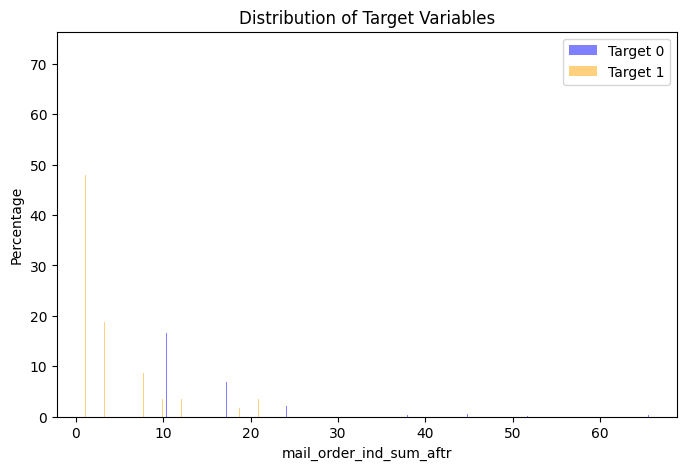

<Figure size 600x600 with 0 Axes>

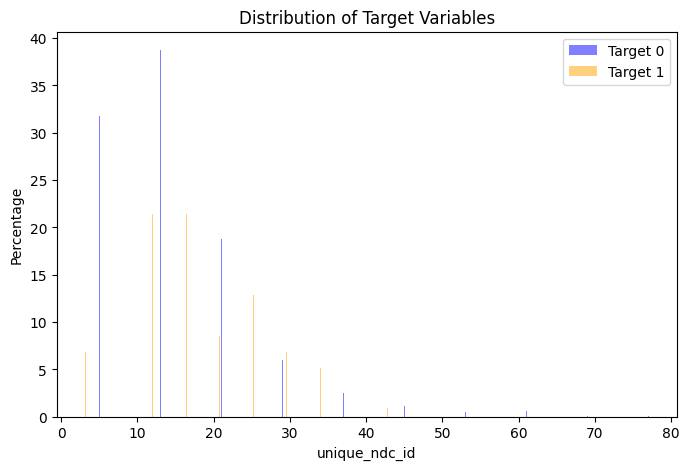

<Figure size 600x600 with 0 Axes>

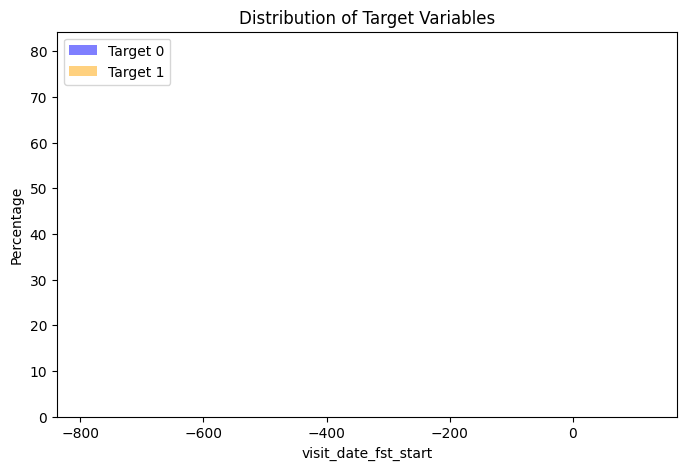

<Figure size 600x600 with 0 Axes>

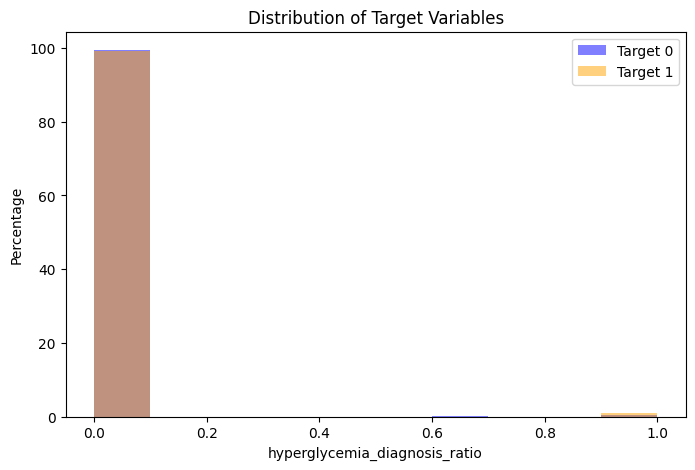

<Figure size 600x600 with 0 Axes>

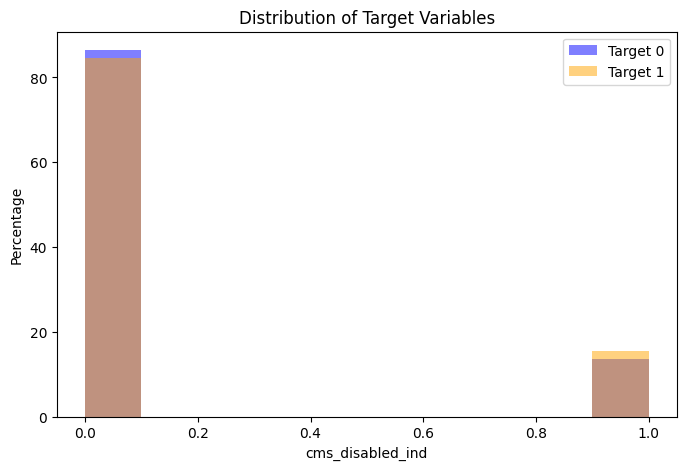

<Figure size 600x600 with 0 Axes>

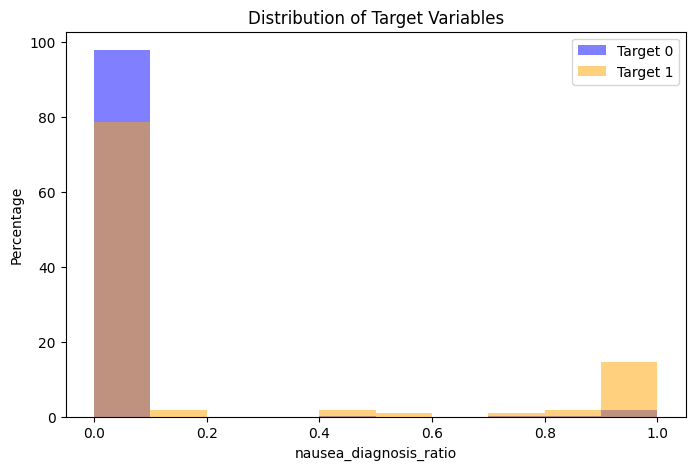

In [ ]:
for i in range(20):
  plt.figure(figsize=(6,6))
  col = feature_importance[i][0]
  # Create a single figure to plot both target variables
  fig, ax = plt.subplots(figsize=(8, 5))

  # Create histograms for Target 0
  hist_target_0, bins_target_0 = np.histogram(class_0_data[col], bins=10, density=True)
  percentage_target_0 = (hist_target_0 / hist_target_0.sum()) * 100
  bin_centers_target_0 = 0.5 * (bins_target_0[:-1] + bins_target_0[1:])
  ax.bar(bin_centers_target_0, percentage_target_0, width=0.1, label="Target 0", color="blue", alpha=0.5)

  # Create histograms for Target 1
  hist_target_1, bins_target_1 = np.histogram(class_1_data[col], bins=10, density=True)
  percentage_target_1 = (hist_target_1 / hist_target_1.sum()) * 100
  bin_centers_target_1 = 0.5 * (bins_target_1[:-1] + bins_target_1[1:])
  ax.bar(bin_centers_target_1, percentage_target_1, width=0.1, label="Target 1", color="orange", alpha=0.5)

  # # Add KDE plots
  # sns.kdeplot(class_0_data[col], color="blue", label="KDE Target 0", ax=ax, shade=True)
  # sns.kdeplot(class_1_data[col], color="orange", label="KDE Target 1", ax=ax, shade=True)
  # Calculate KDE plot percentages
  # kde_percentage_target_0 = (sns.kdeplot(class_0_data[col], color="blue").get_lines()[0].get_data()[1]) * 100
  # kde_percentage_target_1 = (sns.kdeplot(class_1_data[col], color="orange").get_lines()[0].get_data()[1]) * 100

  # # Set y-labels for KDE plots
  # ax.set_yticks(np.arange(0, max(max(percentage_target_0), max(percentage_target_1), 5), 5))
  # ax.set_yticklabels([f"{int(y)}%" for y in np.arange(0, max(max(percentage_target_0), max(percentage_target_1), 5), 5)])


  # Set labels and legend
  ax.set_xlabel(col)
  ax.set_ylabel("Percentage")
  ax.set_title("Distribution of Target Variables")
  ax.legend()

  # Show the plot
  plt.show()

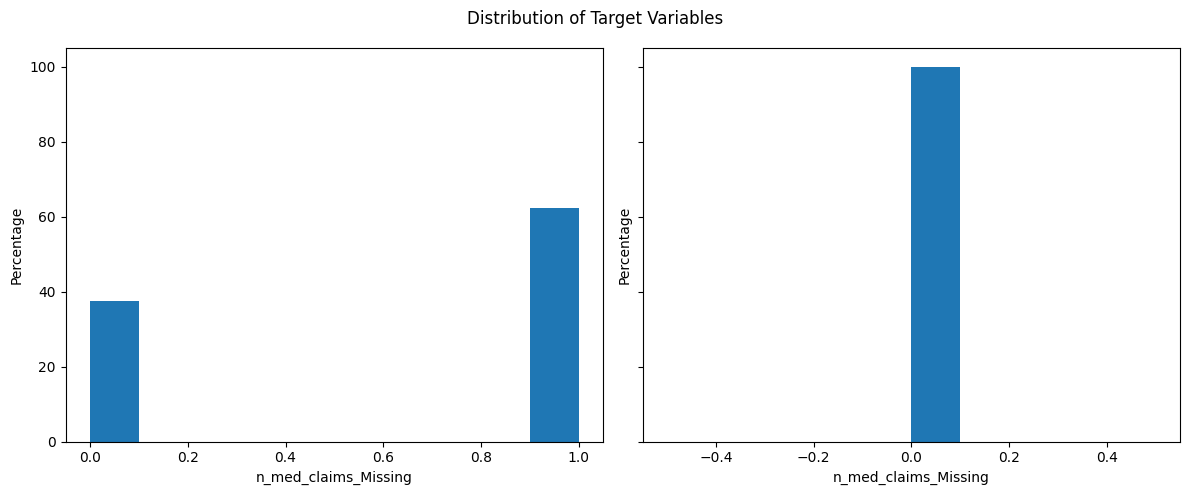

In [ ]:
col = 'n_med_claims_Missing'
# Create a single figure with subplots for both target variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Create histograms for Target 0
hist_target_0, bins_target_0 = np.histogram(class_0_data[col], bins=10)
percentage_target_0 = (hist_target_0 / len(class_0_data[col])) * 100
bin_centers_target_0 = 0.5 * (bins_target_0[:-1] + bins_target_0[1:])
axes[0].bar(bin_centers_target_0, percentage_target_0, width=0.1)
axes[0].set_xlabel(col)
axes[0].set_ylabel("Percentage")

# Create histograms for Target 1
hist_target_1, bins_target_1 = np.histogram(class_1_data[col], bins=10)
percentage_target_1 = (hist_target_1 / len(class_1_data[col])) * 100
bin_centers_target_1 = 0.5 * (bins_target_1[:-1] + bins_target_1[1:])
axes[1].bar(bin_centers_target_1, percentage_target_1, width=0.1)
axes[1].set_xlabel(col)
axes[1].set_ylabel("Percentage")

# Adjust plot labels
plt.suptitle("Distribution of Target Variables")
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-130-76520ddfc93f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(percentage_values_target_0)
<ipython-input-130-76520ddfc93f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(percentage_values_target_1)


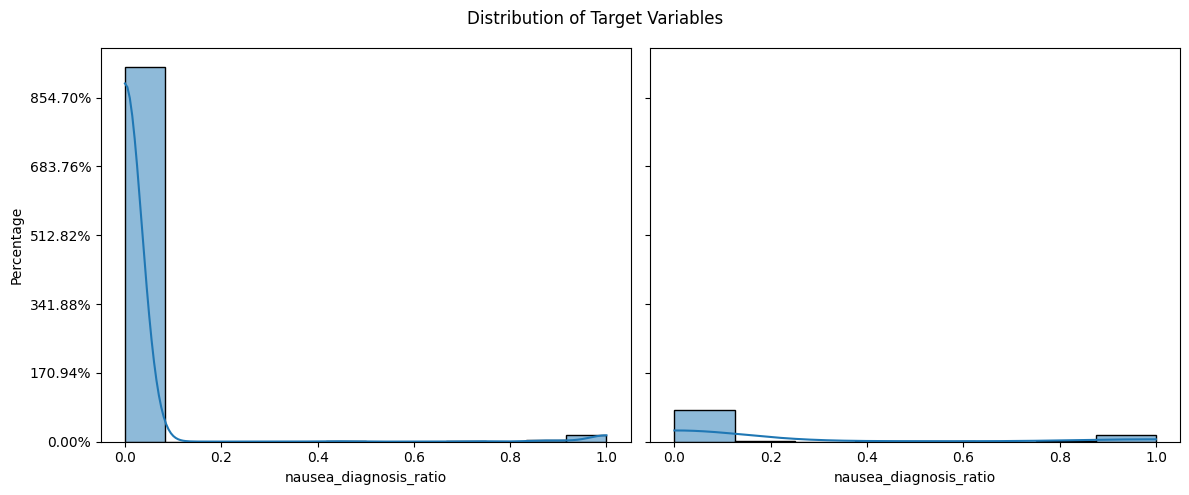

In [ ]:
# Create a single displot with subplots for both target variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Create displot for Target 0
sns.histplot(data=class_0_data[col], kde=True, ax=axes[0])
total_count_target_0 = len(class_0_data[col])
y_values_target_0 = axes[0].get_yticks()
percentage_values_target_0 = [f'{((val / total_count_target_0) * 100):.2f}%' for val in y_values_target_0]
axes[0].set_yticklabels(percentage_values_target_0)
axes[0].set_xlabel(col)
axes[0].set_ylabel("Percentage")

# Create displot for Target 1
sns.histplot(data=class_1_data[col], kde=True, ax=axes[1])
total_count_target_1 = len(class_1_data[col])
y_values_target_1 = axes[1].get_yticks()
percentage_values_target_1 = [f'{((val / total_count_target_1) * 100):.2f}%' for val in y_values_target_1]
axes[1].set_yticklabels(percentage_values_target_1)
axes[1].set_xlabel(col)
axes[1].set_ylabel("Percentage")

# Adjust plot labels
plt.suptitle("Distribution of Target Variables")
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 600x600 with 0 Axes>

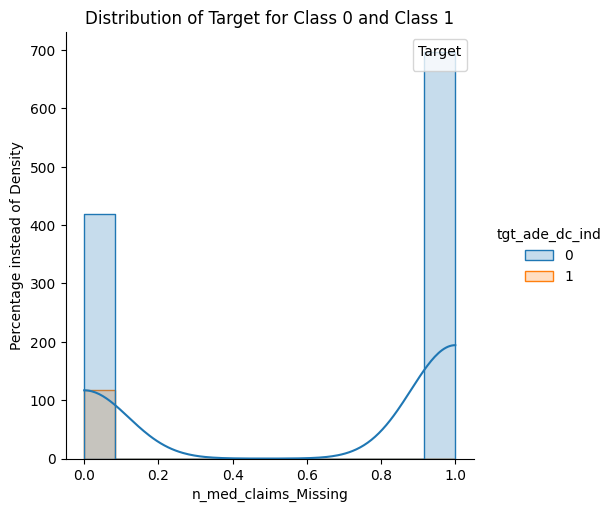

<Figure size 600x600 with 0 Axes>

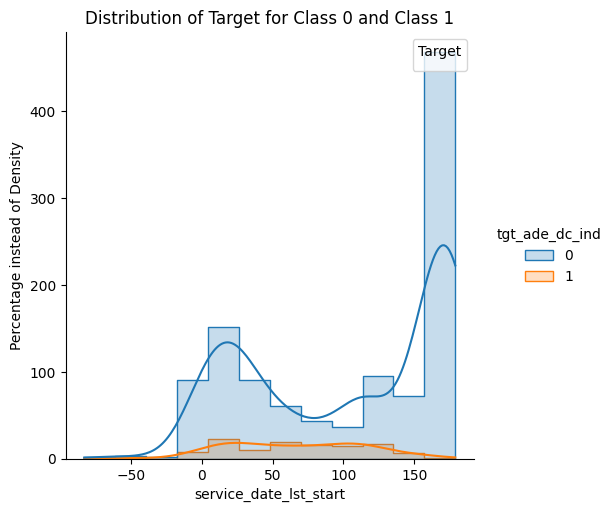

<Figure size 600x600 with 0 Axes>

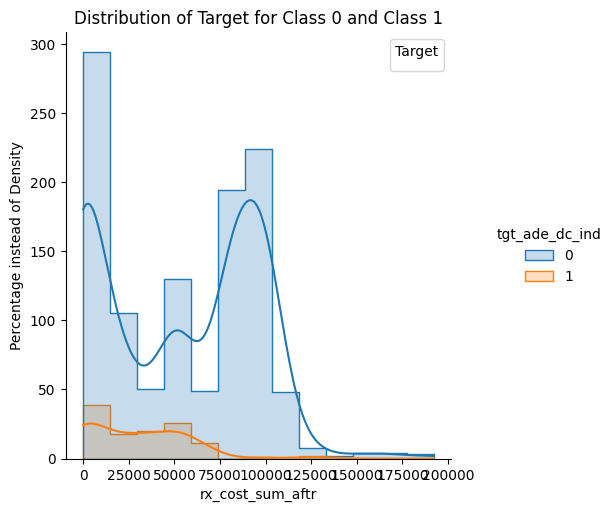

<Figure size 600x600 with 0 Axes>

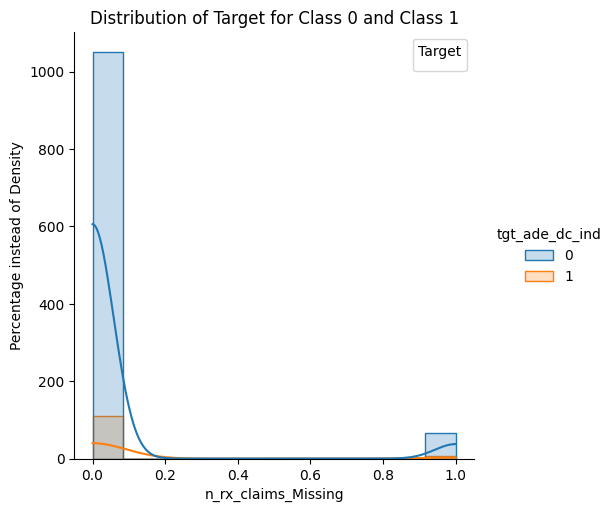

<Figure size 600x600 with 0 Axes>

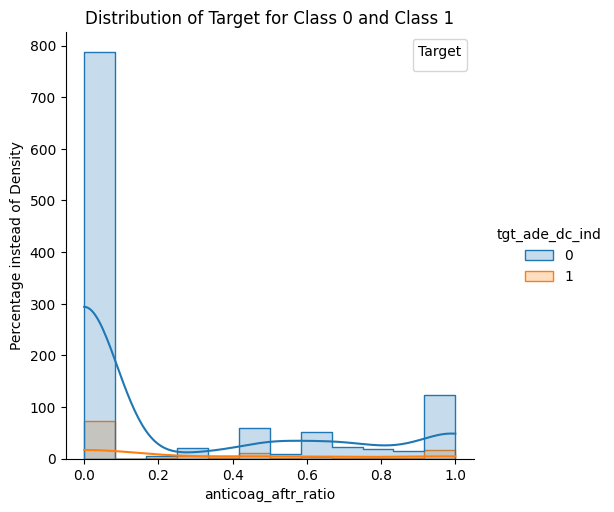

<Figure size 600x600 with 0 Axes>

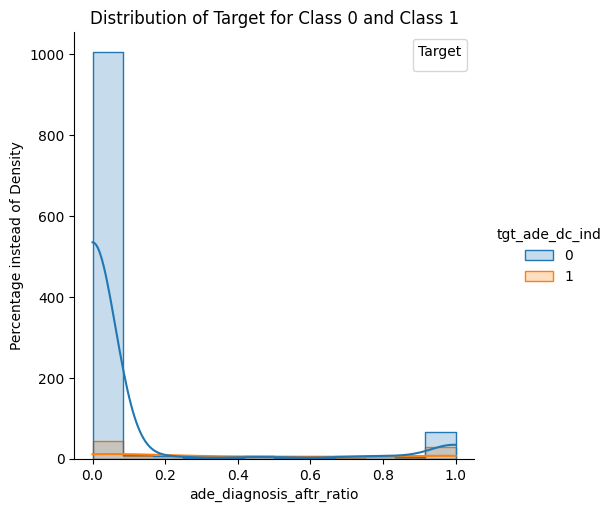

<Figure size 600x600 with 0 Axes>

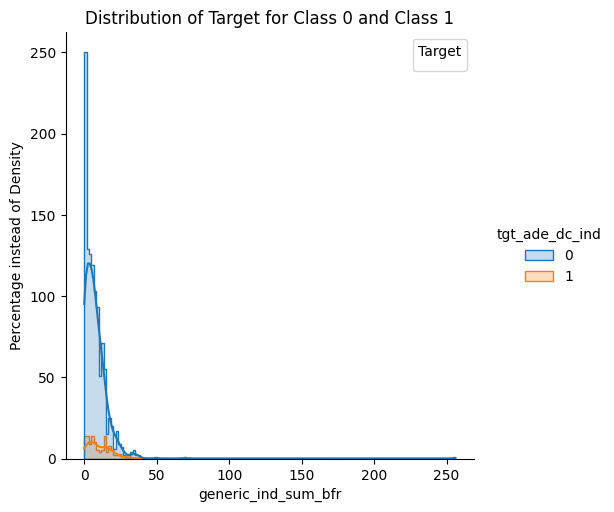

<Figure size 600x600 with 0 Axes>

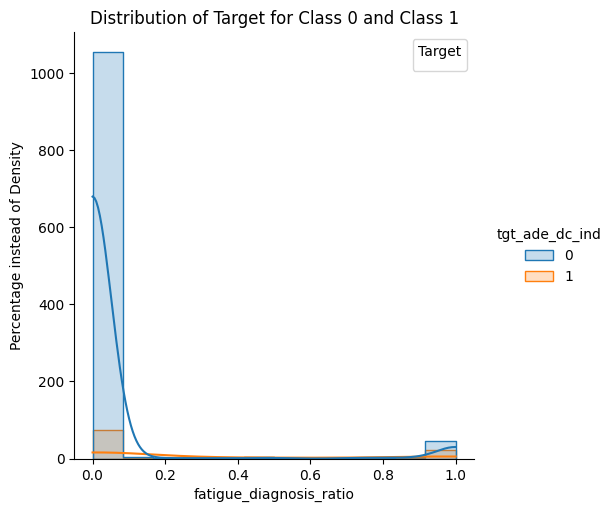

<Figure size 600x600 with 0 Axes>

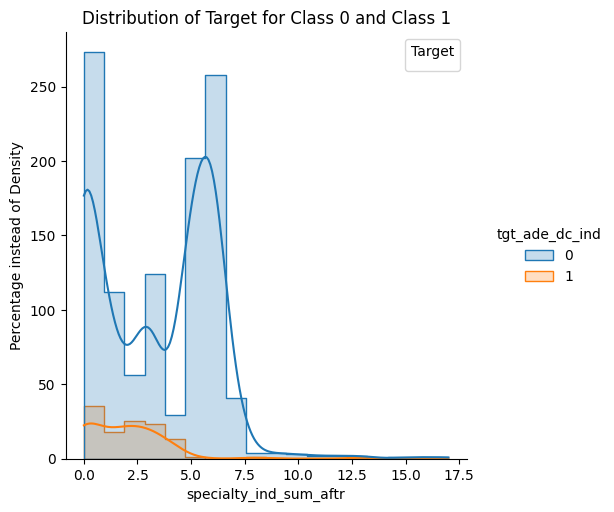

<Figure size 600x600 with 0 Axes>

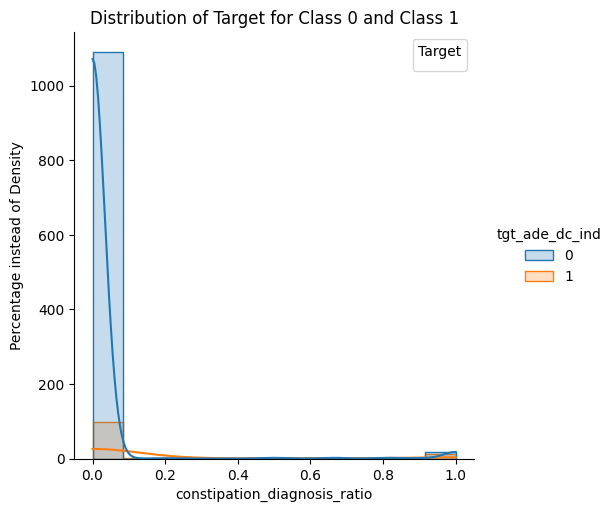

<Figure size 600x600 with 0 Axes>

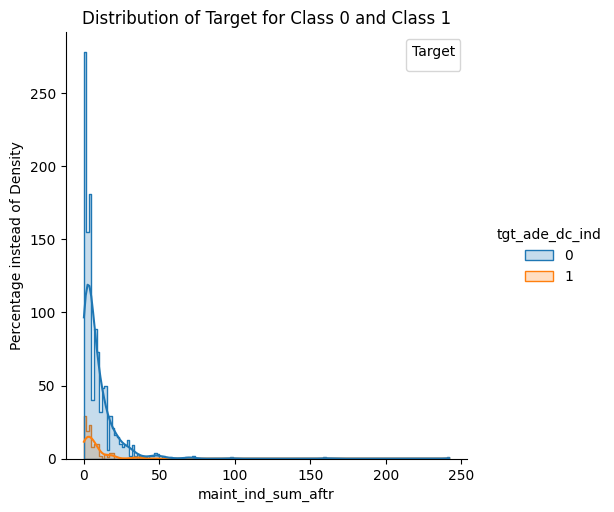

<Figure size 600x600 with 0 Axes>

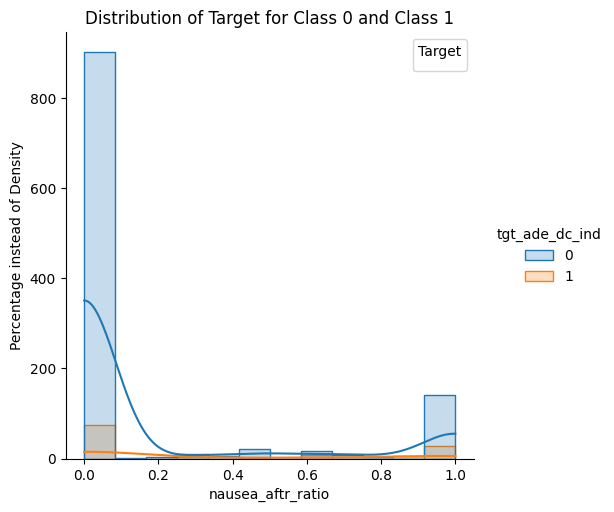

<Figure size 600x600 with 0 Axes>

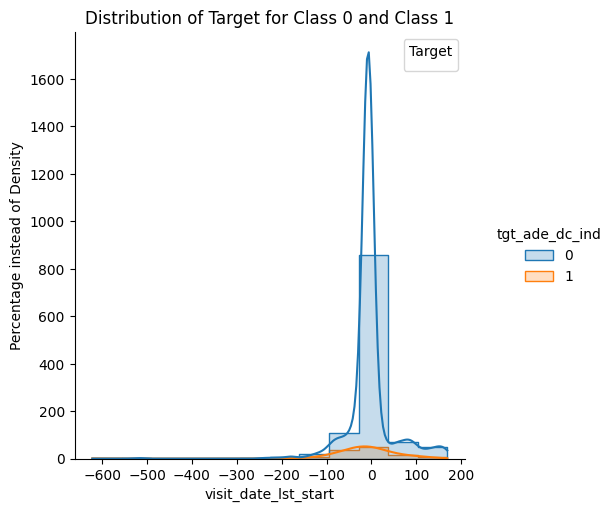

<Figure size 600x600 with 0 Axes>

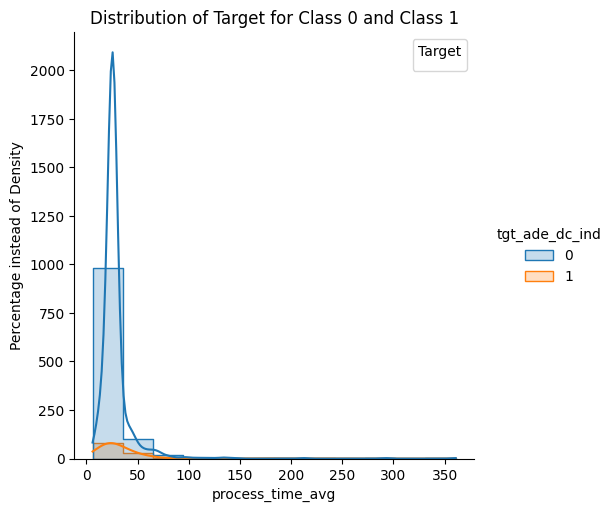

<Figure size 600x600 with 0 Axes>

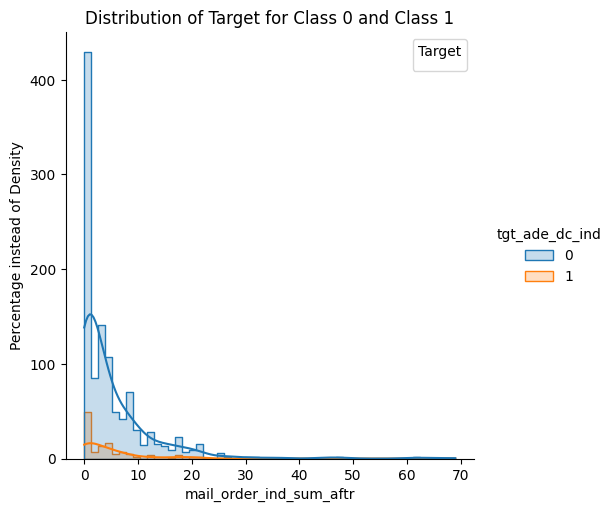

<Figure size 600x600 with 0 Axes>

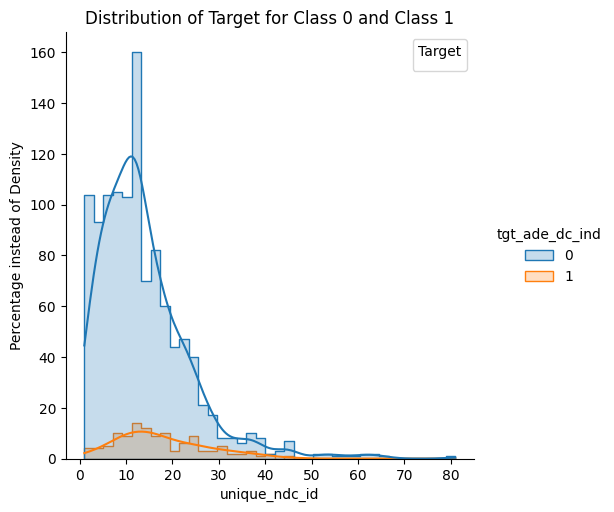

<Figure size 600x600 with 0 Axes>

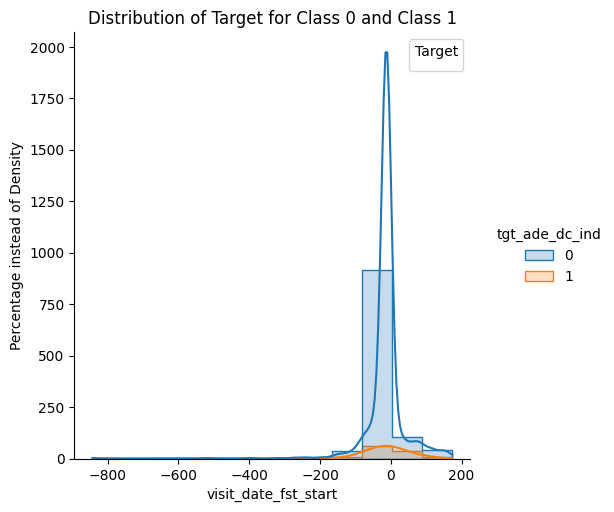

<Figure size 600x600 with 0 Axes>

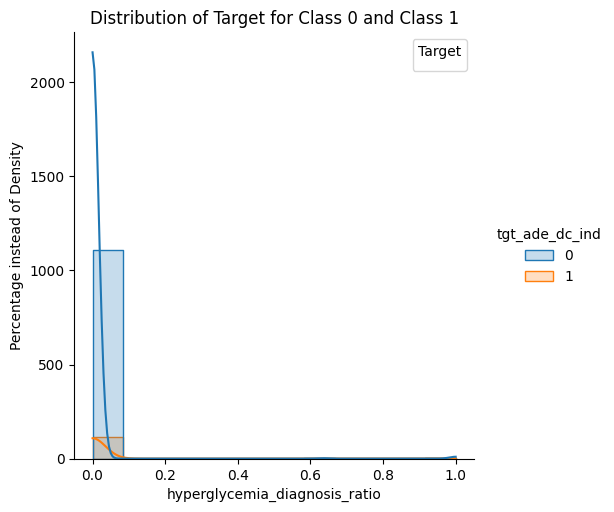

<Figure size 600x600 with 0 Axes>

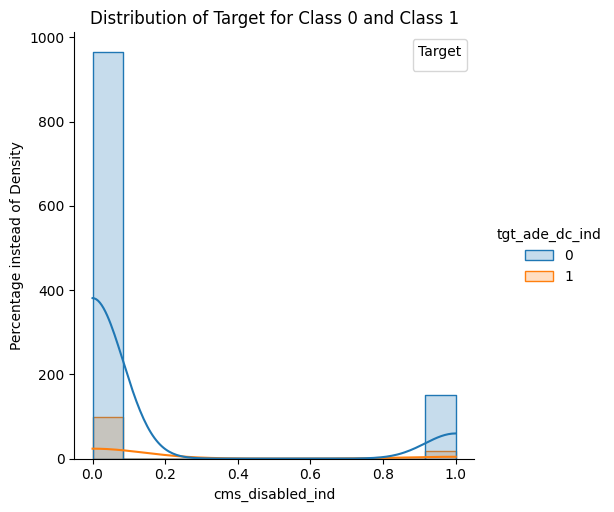

<Figure size 600x600 with 0 Axes>

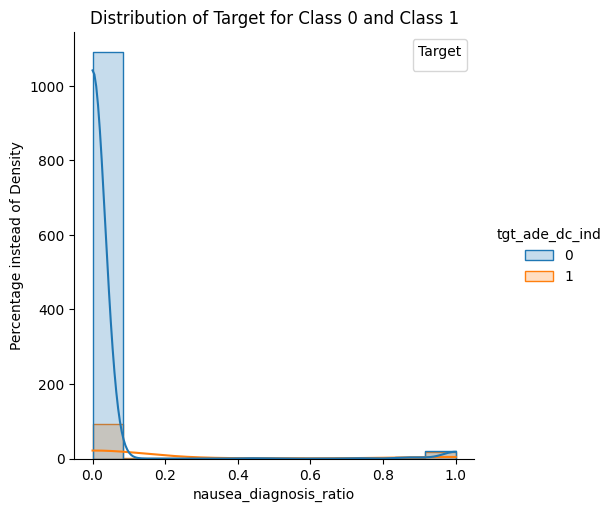

In [ ]:
for i in range(20):
  plt.figure(figsize=(6,6))
  col = feature_importance[i][0]
  # Create two KDE (Kernel Density Estimation) plots for the two classes
  # sns.kdeplot(data=data, x=col, hue='tgt_ade_dc_ind', shade=True) #, common_norm=False
  # Create two KDE (Kernel Density Estimation) plots for the two classes
  # sns.kdeplot(class_0_data[col], label='Class 0', shade=True)
  # sns.displot(data=class_0_data[col], kde=True, element="step", x=col, hue='tgt_ade_dc_ind')
  # plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  # sns.kdeplot(class_1_data[col], label='Class 1', fill=True, hist=True)
  # sns.displot(data=class_1_data[col], kde=True, element="step")
  # plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  # Add labels and a legend
  sns.displot(data=data, kde=True, element="step", x=col, hue='tgt_ade_dc_ind', common_norm=True)
  plt.xlabel(col)
  plt.ylabel('Percentage instead of Density')
  plt.title('Distribution of Target for Class 0 and Class 1')
  plt.legend(title='Target') #, labels=['Class 1', 'Class 0']

  # Show the plot
  plt.show()